<a href="https://colab.research.google.com/github/ArnavJalan-30/digital_image_processing/blob/main/Gaussian_Butterworth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequisite
* Load required packages and load images (already uploaded on Blackboard) in Colab
* Create your own copy of notebook and add required code snippets in between the questions subsections. Also display the figures at each stage.
*Submit the demo on BlackBoard by Mar 15, 2024 in **.ipynb** format.
*Colab can be exported as a notebook file or Python file by **File > Download .ipynb** or **File > Download .py**. Exported notebook files can be reloaded into Google Colab or used in Jupyter Notebook.
* Please go through [Colab document](https://colab.research.google.com/drive/1YKHHLSlG-B9Ez2-zf-YFxXTVgfC_Aqtt) for further information.

* **Use ONLY numpy and tensorflow/pytorch functions for any type of operations**


In [64]:
import tensorflow as tf
import numpy as np
from scipy import ndimage as nd
from scipy import interpolate as inter
from matplotlib import pyplot as plt
import imageio.v2 as imageio

#a)Load 'ckt-board-orig.tif'


Original Data_type is uint8
Data_type is float32
Image Size is (448, 464)
Image min and max are (0.0, 255.0)


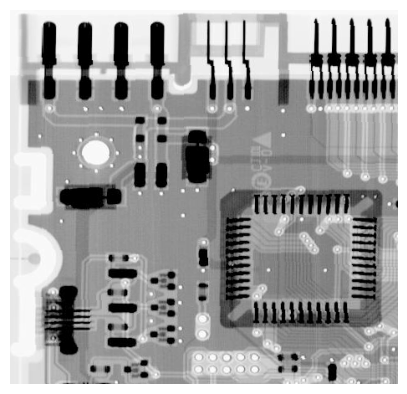

In [65]:
img_path = '/content/ckt-board-orig.tif'
img_a0 = imageio.imread(img_path)
# img_a0 = tf.convert_to_tensor(img_a0, dtype=tf.float32)
# img_a = tf.image.rgb_to_grayscale(img_a0)
img_a = img_a0.astype(np.float32)
print('Original Data_type is {}'.format(img_a0.dtype))
print('Data_type is', img_a.dtype)
print('Image Size is {}'.format(img_a.shape))
print('Image min and max are ({}, {})'.format(img_a.min(),img_a.max()))
#################################################
plt.figure(figsize=(5,5))
plt.imshow(img_a, cmap='gray')
plt.axis('off')
plt.show()

#b) Apply DFT to a)

In [66]:
img_b = np.fft.fft2(img_a)
#################################################
print('FFT Data_type is {}'.format(img_b.dtype))
print('FFT Size is {}'.format(img_b.shape))
print('FFT min and max are ({}, {})'.format(img_b.min(),img_b.max()))
#################################################

FFT Data_type is complex128
FFT Size is (448, 464)
FFT min and max are ((-1449185.750472431+241803.37904497175j), (31337858+0j))


In [67]:
#a = -1449185.750472431+241803.37904497175j
#b = np.abs(a)
#print(a)
#print(b)
img_b_mod = np.abs(img_b)
#################################################
print('mod-FFT Data_type is {}'.format(img_b_mod.dtype))
print('mod-FFT Size is {}'.format(img_b_mod.shape))
print('mod-FFT min and max are ({}, {})'.\
      format(img_b_mod.min(),img_b_mod.max()))
print('log mod-FFT min and max are ({}, {})'.\
      format(np.log2(1+img_b_mod.min()),np.log2(1+img_b_mod.max()) ))
#################################################

mod-FFT Data_type is float64
mod-FFT Size is (448, 464)
mod-FFT min and max are (2.6222759435509144, 31337858.0)
log mod-FFT min and max are (1.856896454412996, 24.90140328257998)


#c) Apply log to FFT

In [68]:
min_lb = np.log2(1+img_b_mod.min())
max_lb = np.log2(1+img_b_mod.max())

img_b_lm = np.log2(1+img_b_mod)
img_c = (img_b_lm-min_lb) / (max_lb - min_lb)
img_c = 255.0*img_c
#################################################
print('lm-FFT Data_type is {}'.format(img_c.dtype))
print('mod-FFT Size is {}'.format(img_c.shape))
print('mod-FFT min and max are ({}, {})'.format(img_c.min(),img_c.max()))
#################################################

lm-FFT Data_type is float64
mod-FFT Size is (448, 464)
mod-FFT min and max are (0.0, 255.0)


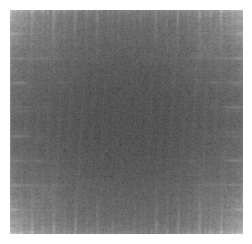

In [69]:
plt.figure(figsize=(3,3))
plt.imshow(img_c, cmap='gray')
plt.axis('off')
plt.show()

#d) Apply fft-shift to image a) and then apply fft

In [70]:
img_fft_a = np.fft.fft2(img_a)
img_d = np.fft.fftshift(img_fft_a)
#################################################
print('shift-FFT Data_type is {}'.format(img_d.dtype))
print('shift-FFT Size is {}'.format(img_d.shape))
print('shift-FFT min and max are ({}, {})'.format(img_d.min(),img_d.max()))
#################################################

shift-FFT Data_type is complex128
shift-FFT Size is (448, 464)
shift-FFT min and max are ((-1449185.750472431+241803.37904497175j), (31337858+0j))


In [71]:
img_d_mod = np.abs(img_d)
min_ld = np.log2(1+img_d_mod.min())
max_ld = np.log2(1+img_d_mod.max())

img_d_lm = np.log2(1+img_d_mod)
img_e = (img_d_lm-min_ld) / (max_ld - min_ld)
img_e = 255.0*img_e
#################################################
print('shift-lm-FFT Data_type is {}'.format(img_e.dtype))
print('shift-mod-FFT Size is {}'.format(img_e.shape))
print('shift-mod-FFT min and max are ({}, {})'.format(img_e.min(),img_e.max()))
#################################################

shift-lm-FFT Data_type is float64
shift-mod-FFT Size is (448, 464)
shift-mod-FFT min and max are (0.0, 255.0)


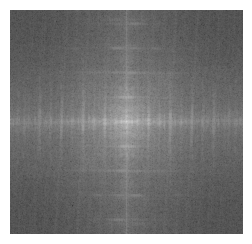

In [72]:
plt.figure(figsize=(3,3))
plt.imshow(img_e, cmap='gray')
plt.axis('off')
plt.show()

#f)Creating meshgrid for coordinate locations

In [73]:

print(img_a0.shape)
c_x = np.floor(img_a0.shape[0]/2)
c_y = np.floor(img_a0.shape[1]/2)
print((c_x,c_y))
[ii,jj] = np.meshgrid(range(img_a0.shape[0]), \
                      range(img_a0.shape[1]),indexing='ij')
print(ii)
print(jj)

(448, 464)
(224.0, 232.0)
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [445 445 445 ... 445 445 445]
 [446 446 446 ... 446 446 446]
 [447 447 447 ... 447 447 447]]
[[  0   1   2 ... 461 462 463]
 [  0   1   2 ... 461 462 463]
 [  0   1   2 ... 461 462 463]
 ...
 [  0   1   2 ... 461 462 463]
 [  0   1   2 ... 461 462 463]
 [  0   1   2 ... 461 462 463]]


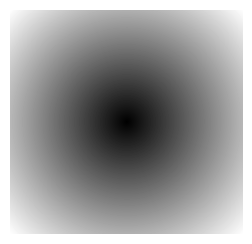

In [74]:
dist = np.sqrt(np.power(ii-c_x,2) + np.power(jj-c_y,2))
plt.figure(figsize=(3,3))
plt.imshow(dist, cmap='gray')
plt.axis('off')
plt.show()

#g) creating Ideal Low pass filter of radius 80

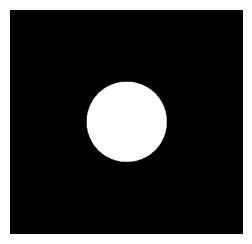

In [75]:
H_low = (dist <= 80)
plt.figure(figsize=(3,3))
plt.imshow(H_low, cmap='gray')
plt.axis('off')
plt.show()

#h)Apply low pass filter to a)

In [76]:
fft_low_shifted = img_d*H_low  # convolution spatial domain
fft_low = np.fft.ifftshift(fft_low_shifted)
img_low = np.fft.ifft2(fft_low)
print('Data_type is', img_low.dtype)
print('Image Size is {}'.format(img_low.shape))
print('Image min and max are ({}, {})'.format(img_low.min(),img_low.max()))

img_low = img_low.real
print('Data_type is', img_low.dtype)
print('Image Size is {}'.format(img_low.shape))
print('Image min and max are ({}, {})'.format(img_low.min(),img_low.max()))


Data_type is complex128
Image Size is (448, 464)
Image min and max are ((-49.450795368525085-8.86212475105026e-15j), (303.78228287513474-2.701757365350288e-15j))
Data_type is float64
Image Size is (448, 464)
Image min and max are (-49.450795368525085, 303.78228287513474)


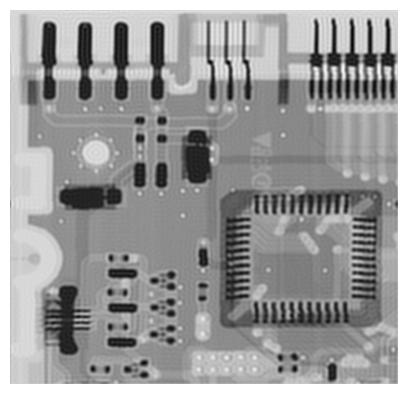

In [77]:
plt.figure(figsize=(5,5))
plt.imshow(img_low, cmap='gray')
plt.axis('off')
plt.show()

#Q1.a) load 'ckt_gaussian_var_1000_mean_0.tif' and calculate its shifted DFT. Display it using log-transform [0 Marks]

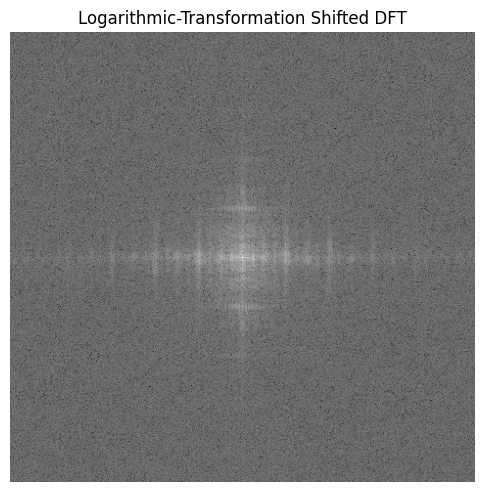

In [78]:
img_path = 'ckt_gaussian_var_1000_mean_0.tif'
img = imageio.imread(img_path)

# Calculating 2D fast Fourier transform (FFT)
fft_shifted = np.fft.fftshift(np.fft.fft2(img))

# Taking the absolute value and add 1 to avoid division by zero
fft_abs = np.abs(fft_shifted) + 1

# Applying logarithmic transformation for better visualization
fft_log = np.log2(fft_abs)

plt.figure(figsize=(6, 6))
plt.imshow(fft_log, cmap='gray')
plt.axis('off')
plt.title('Logarithmic-Transformation Shifted DFT')
plt.show()


#Q1.b) Apply Ideal Low Pass Filter with radius 80 to Q1.a) [0 Marks]

---



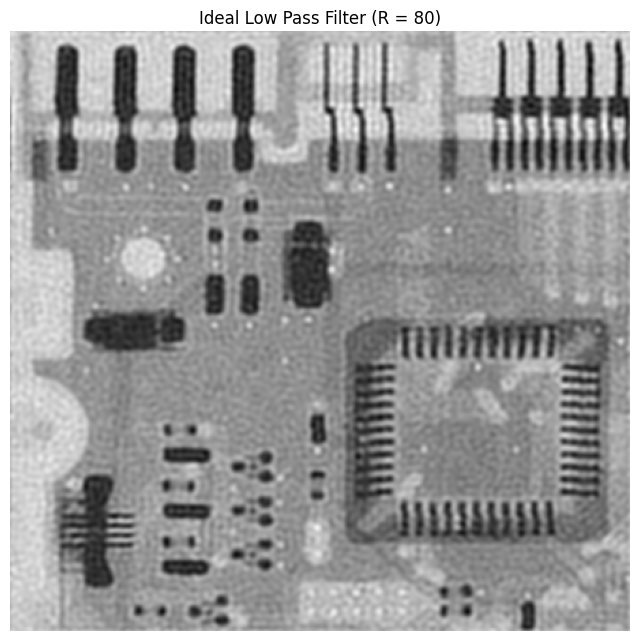

In [79]:
# Retrieving image dimensions
image_rows, image_columns = img.shape


# Calculating center coordinates
center_row = image_rows // 2
center_column = image_columns // 2


# Generating frequency domain coordinates (offset by center coordinates)
x_coords = np.arange(-center_column, image_columns - center_column)
y_coords = np.arange(-center_row, image_rows - center_row)


# Creating a mesh grid for frequency domain representation
frequency_grid_x, frequency_grid_y = np.meshgrid(x_coords, y_coords)


# Calculating Euclidean distance from the center for each point in the grid
distance_from_center = np.sqrt(frequency_grid_x**2 + frequency_grid_y**2)


filter_radius = 80


# Creating the ideal low-pass filter mask
low_pass_filter = np.where(distance_from_center <= filter_radius, 1, 0)


# Applying the filter in the frequency domain
filtered_fft = fft_shifted * low_pass_filter


# Shift the filtered fft back to its original position
inverse_shifted_fft = np.fft.ifftshift(filtered_fft)


# Inverse FFT to obtain the filtered image in spatial domain
filtered_image = np.fft.ifft2(inverse_shifted_fft).real


plt.figure(figsize=(8, 8))
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')
plt.title('Ideal Low Pass Filter (R = 80)')
plt.show()


#Q1.c) Apply Butterworth Lowpass Filter with $D_0=60$ to Q1.a)  [3 Marks]

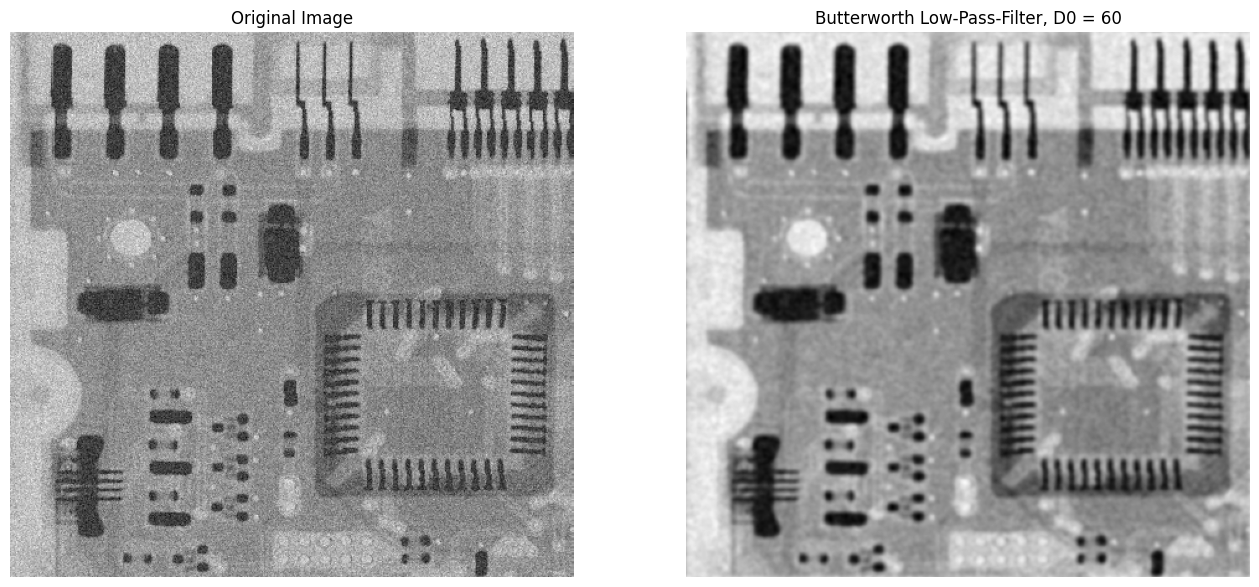

In [80]:
cutoff_frequency = 60
filter_order = 2

# Creating Butterworth low-pass filter mask
butterworth_low_pass_filter = 1 / (1 + (distance_from_center / cutoff_frequency)**(2 * filter_order))

# Applying the filter in the frequency domain
filtered_fft = fft_shifted * butterworth_low_pass_filter

# Shift the filtered fft back to its original position
inverse_shifted_fft = np.fft.ifftshift(filtered_fft)

# Inverse FFT to obtain the filtered image in spatial domain
filtered_image = np.fft.ifft2(inverse_shifted_fft).real

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Butterworth Low-Pass-Filter, D0 = 60')
plt.axis('off')
plt.show()


#Q1.d)Apply Gaussian Lowpass Filter with $D_0=55$ to Q1.a)  [2 Marks]

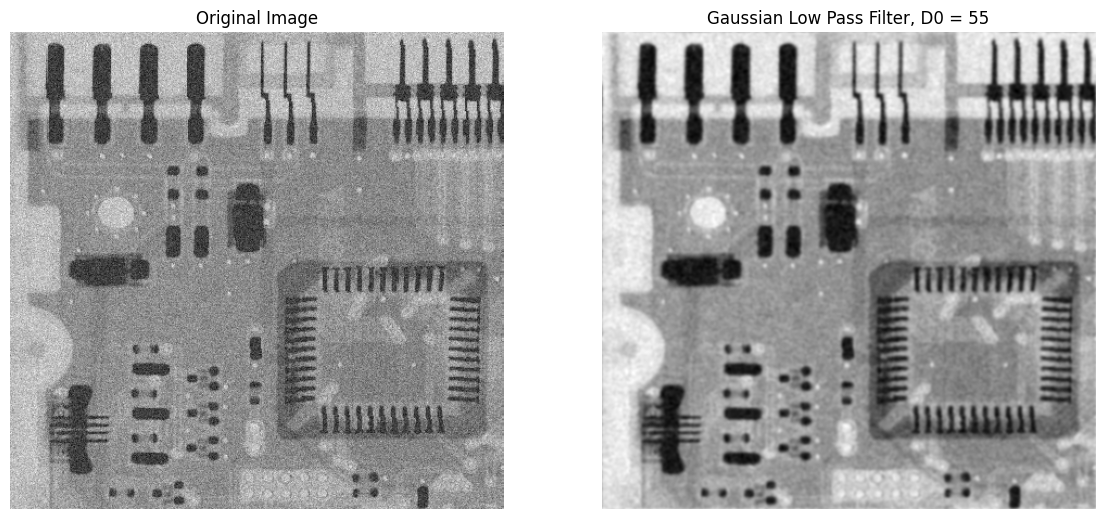

In [81]:
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
x = np.arange(-ccol, cols - ccol)
y = np.arange(-crow, rows - crow)
X, Y = np.meshgrid(x, y)
dist = np.sqrt(X**2 + Y**2)

D0 = 55
H_low = np.exp(-dist**2 / (2 * D0**2))

fft_shifted = np.fft.fftshift(np.fft.fft2(img))
fft_filtered = fft_shifted * H_low
fft_inverse_shifted = np.fft.ifftshift(fft_filtered)
img_filtered = np.fft.ifft2(fft_inverse_shifted).real

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_filtered, cmap='gray')
plt.title('Gaussian Low Pass Filter, D0 = 55')
plt.axis('off')
plt.show()


# Q2) Apply all three HighPass Filter to 'ckt_board_gauss-var-400.tif' with $D_0$ as 40,70,and 90 respectively. [5 Marks\]

<ipython-input-82-ce891190a187>:17: RuntimeWarning: divide by zero encountered in divide
  H_high_butterworth = 1 / (1 + ((D0**2) / D_squared))


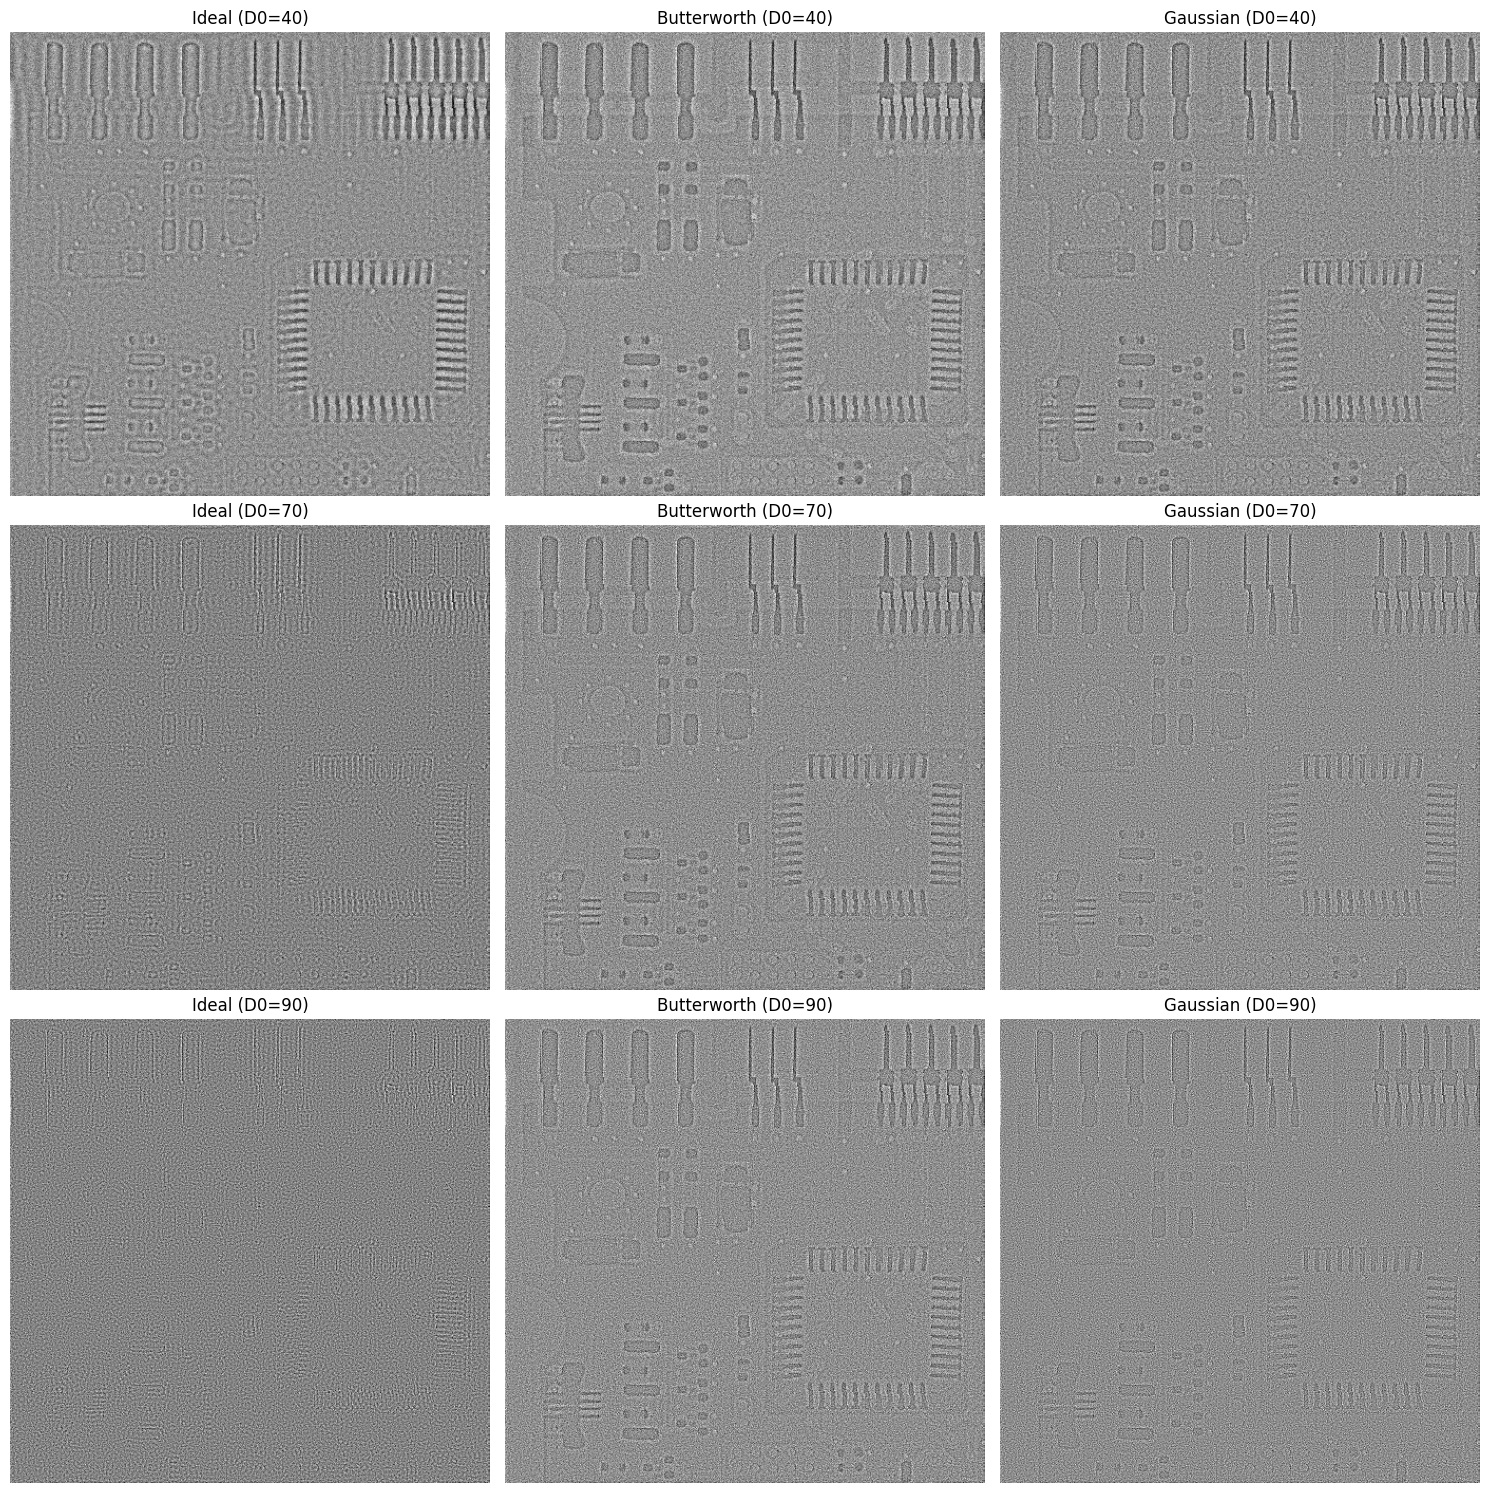

In [82]:
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
x = np.arange(-ccol, cols - ccol)
y = np.arange(-crow, rows - crow)
X, Y = np.meshgrid(x, y)
dist = np.sqrt(X**2 + Y**2)

D0_values = [40, 70, 90]
filtered_images = []

for D0 in D0_values:
  # Ideal High Pass Filter (IHPF)
  D_squared = X**2 + Y**2
  H_high_ideal = np.where(D_squared > D0**2, 1, 0)

  # Butterworth High Pass Filter (BHPF)
  H_high_butterworth = 1 / (1 + ((D0**2) / D_squared))

  # Gaussian High Pass Filter (GHPF)
  H_high_gaussian = 1 - np.exp(-D_squared / (2 * D0**2))


  fft_filtered_ideal = fft_shifted * H_high_ideal
  fft_filtered_butterworth = fft_shifted * H_high_butterworth
  fft_filtered_gaussian = fft_shifted * H_high_gaussian


  fft_inverse_shifted_ideal = np.fft.ifftshift(fft_filtered_ideal)
  fft_inverse_shifted_butterworth = np.fft.ifftshift(fft_filtered_butterworth)
  fft_inverse_shifted_gaussian = np.fft.ifftshift(fft_filtered_gaussian)


  img_filtered_ideal = np.fft.ifft2(fft_inverse_shifted_ideal).real
  img_filtered_butterworth = np.fft.ifft2(fft_inverse_shifted_butterworth).real
  img_filtered_gaussian = np.fft.ifft2(fft_inverse_shifted_gaussian).real


  filtered_images.append(img_filtered_ideal)
  filtered_images.append(img_filtered_butterworth)
  filtered_images.append(img_filtered_gaussian)

plt.figure(figsize=(15, 15))

titles = ['Ideal (D0=40)', 'Butterworth (D0=40)', 'Gaussian (D0=40)',
          'Ideal (D0=70)', 'Butterworth (D0=70)', 'Gaussian (D0=70)',
          'Ideal (D0=90)', 'Butterworth (D0=90)', 'Gaussian (D0=90)']

for i, current in enumerate(filtered_images):
  plt.subplot(3, 3, i + 1)
  plt.imshow(current, cmap='gray')
  plt.title(titles[i])
  plt.axis('off')

plt.tight_layout()
plt.show()


#Q3) Apply Band Pass filter to 'ckt_board_gauss-var-400.tif' with $D_1=89.5$ and $D_2=90$. [5 Marks]

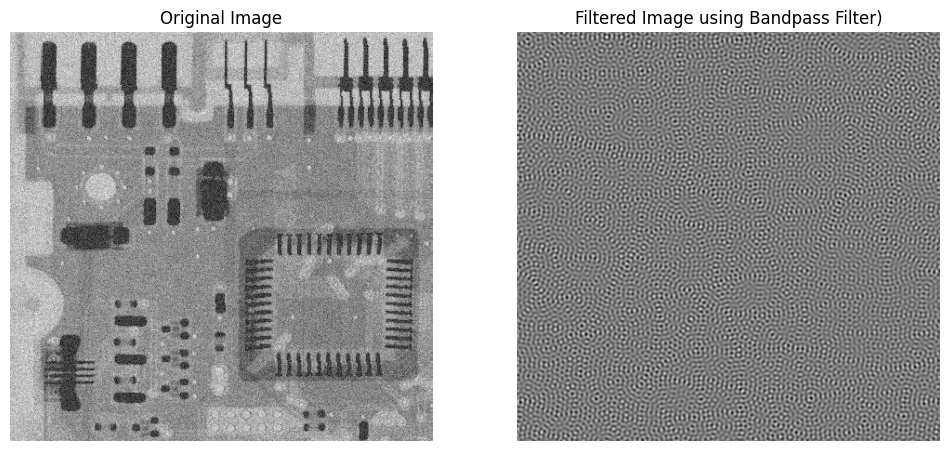

In [83]:
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
x = np.arange(-ccol, cols - ccol)
y = np.arange(-crow, rows - crow)
X, Y = np.meshgrid(x, y)
dist = np.sqrt(X**2 + Y**2)

D1 = 89.5
D2 = 90


H_bandpass = np.logical_and(dist >= D1, dist <= D2).astype(float)



fft_filtered = fft_shifted * H_bandpass



fft_inverse_shifted = np.fft.ifftshift(fft_filtered)



img_filtered = np.fft.ifft2(fft_inverse_shifted).real


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img_filtered, cmap='gray')
plt.title('Filtered Image using Bandpass Filter)')
plt.axis('off')

plt.show()
